# Unicorn Companies Analysis
This project is to analysis, explore and answer specific questions about the unicorn companies

## Step 1: Importing Libraries and Data Reading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
unicorn = pd.read_csv('Unicorn_Companies.csv')
unicorn.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


## Step 2: Data cleaning
This includes the process of checking and removing null and dupplicated, corecting the data types, etc.

In [4]:
# To check for null values
unicorn.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [5]:
# to remove null values
unicorn = unicorn.dropna()

In [6]:
# to check for duplicates
unicorn.duplicated().sum()

0

In [7]:
# to change the column names to lowercase

unicorn.columns = [col.lower() for col in unicorn.columns]

In [8]:
# to change object data type to date datatype and extract the 'year'

unicorn['date joined'] = pd.to_datetime(unicorn['date joined'])
unicorn['year joined'] = unicorn['date joined'].dt.year

In [9]:
# function to replace string and convert values in million to billion
def convert_value(value_str):
    value_str = value_str.strip('$')
    if value_str.endswith('M'):
        try:
            return float(value_str[:-1]) * 0.001
        except ValueError:
            pass
    elif value_str.endswith('B'):
        try:
            return float(value_str[:-1])
        except ValueError:
            pass

In [10]:
unicorn['funding_converted'] = unicorn['funding'].apply(convert_value)

In [11]:
unicorn[unicorn['funding_converted'].isna()]

,company,valuation,date joined,industry,city,country,continent,year founded,funding,select investors,year joined,funding_converted
215,SSENSE,$4B,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,Unknown,Sequoia Capital,2021,NaN
424,Uplight,$2B,2021-03-03,Other,Boulder,United States,North America,2019,Unknown,"Rubicon Technology Partners, Max Ventures, Inc...",2021,NaN
567,ISN,$2B,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,Unknown,Blackstone,2020,NaN
639,SITECH DEV,$1B,2019-05-16,Other,Guiyang,China,Asia,2017,Unknown,China Prosperity Capital,2019,NaN
651,Xiaobing,$1B,2021-07-12,Fintech,Beijing,China,Asia,2020,Unknown,"NetEase Capital, Northern Light Venture Capita...",2021,NaN
717,Veepee,$1B,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,Unknown,"Summit Partners, Qatar Holding",2007,NaN
733,DistroKid,$1B,2021-08-16,Internet software & services,New York,United States,North America,2013,Unknown,"Insight Partners, Silversmith Capital Partners...",2021,NaN
866,Assembly,$1B,2021-09-21,Internet software & services,Culver City,United States,North America,2019,Unknown,"Advent International, PSG, Providence Equity P...",2021,NaN
890,Carson Group,$1B,2021-07-14,Fintech,Lincoln,United States,North America,2012,Unknown,Bain Capital,2021,NaN
945,Iodine Software,$1B,2021-12-01,Data management & analytics,Austin,United States,North America,2010,Unknown,"Advent International, Bain Capital Ventures, S...",2021,NaN


there are 12 more null values in the 'funding_converted' column, this is becaue we do not know the funding price. since there is no means to verify this values, they will have to be dropped.

In [12]:
# to drop null values
unicorn = unicorn.dropna()

In [13]:
# to replace strings in 'valuation' column
unicorn['valuation'] = unicorn['valuation'].str.replace('B', '')
unicorn['valuation'] = unicorn['valuation'].str.replace('$', '', regex = True)

In [14]:
# to change data type to integer
unicorn['valuation'] = unicorn['valuation'].astype(int)

In [15]:
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company            1045 non-null   object        
 1   valuation          1045 non-null   int32         
 2   date joined        1045 non-null   datetime64[ns]
 3   industry           1045 non-null   object        
 4   city               1045 non-null   object        
 5   country            1045 non-null   object        
 6   continent          1045 non-null   object        
 7   year founded       1045 non-null   int64         
 8   funding            1045 non-null   object        
 9   select investors   1045 non-null   object        
 10  year joined        1045 non-null   int64         
 11  funding_converted  1045 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(7)
memory usage: 102.1+ KB


## Step 3: Data Manipulation and Exploration
In this section we will answer some important questions by manipulating and exploring our dataset

In [16]:
unicorn.describe()

,valuation,year founded,year joined,funding_converted
count,1045.000000,1045.000000,1045.000000,1045.000000
mean,3.478469,2012.892823,2019.901435,0.557741
std,8.612828,5.704404,1.971261,0.814560
min,1.000000,1919.000000,2011.000000,0.000000
25%,1.000000,2011.000000,2019.000000,0.223000
50%,2.000000,2014.000000,2021.000000,0.370000
75%,3.000000,2016.000000,2021.000000,0.610000
max,180.000000,2021.000000,2022.000000,14.000000


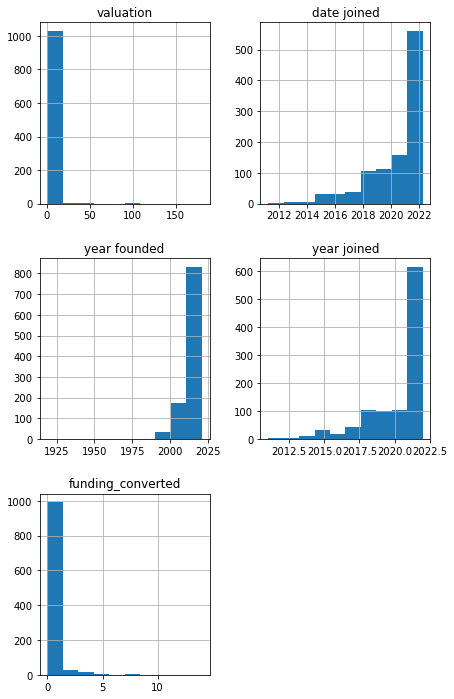

In [17]:
unicorn.hist(figsize=(7,12))
plt.show()

In [18]:
# checking the corelation between the columns
unicorn.corr()

,valuation,year founded,year joined,funding_converted
valuation,1.000000,-0.078304,-0.230955,0.597117
year founded,-0.078304,1.000000,0.349667,-0.080836
year joined,-0.230955,0.349667,1.000000,-0.294758
funding_converted,0.597117,-0.080836,-0.294758,1.000000


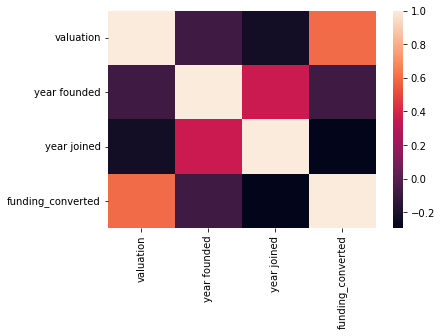

In [19]:
# displaying the correlatio between the columns
sns.heatmap(unicorn.corr())
plt.show()

We see very little correlation between some columns

### Question 1: Which Unicorn companies had the biggest return on investment?

In [20]:
# dropping the row where funding is equal to zero
unicorn = unicorn[unicorn['funding'] != '$0M']

In [21]:
# finding the Return on investment(ROI)
unicorn['roi'] = ((unicorn['valuation'] - unicorn['funding_converted'])/unicorn['funding_converted']*100)

In [22]:
# subsetting the list of companies and their ROI
company_roi = unicorn[['company','roi', 'year founded']]
print(company_roi.sort_values(by='roi', ascending=False).round(2))

              company        roi  year founded
239            Zapier  399900.00          2011
61             Dunamu   12576.06          2012
792         Workhuman   11011.11          1999
361              CFGI   10426.32          2000
743            Manner    9900.00          2015
...               ...        ...           ...
577        Magic Leap     -33.33          2010
657   Hello TransTech     -50.00          2016
1010  REEF Technology     -50.00          2015
640          Snapdeal     -50.00          2008
615              Fair     -50.00          2016

[1044 rows x 3 columns]


we found that Zapier is the company with the highest ROI

### Question 2: How long does it usually take for a company to become a unicorn?

In [23]:
# to find the duration between the year founded and year joined
unicorn['duration']= abs(unicorn['year founded'] - unicorn['year joined'])

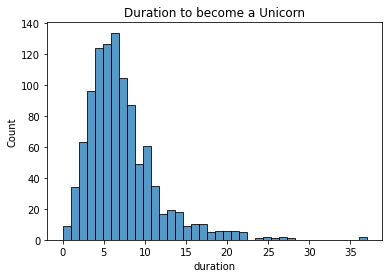

In [24]:
# to plot the duration
sns.histplot(unicorn['duration'])
plt.title('Duration to become a Unicorn')
plt.show()

In [25]:
# to print the average duration
print(unicorn['duration'].mean())

6.92911877394636


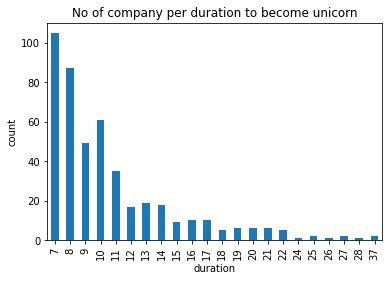

In [26]:
# to filter duration greater than or equal to the mean duration and plot the bar chart
filtered_unicorn = unicorn[unicorn['duration'] >= 7]
result = filtered_unicorn.groupby('duration')['company'].count()

result.plot(kind='bar')
plt.xlabel('duration')
plt.ylabel('count')
plt.title('No of company per duration to become unicorn')
plt.show()

We found that it takes an average duration of 7 years to become a unicorn company, since a majority of this companies took same duration we can infer that it has always been that way.

### Question 3: Which countries have the most unicorns? Are there any cities that appear to be industry hubs

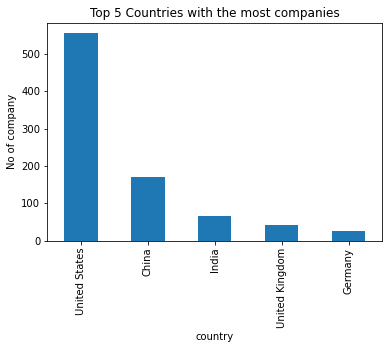

In [27]:
# to count companies in each country, filter top 5 countries and plot a bar chart

company_per_country = unicorn.groupby('country')['company'].count()
sort_country = company_per_country.sort_values(ascending=False)
top_5_countries = sort_country[0:5]

top_5_countries.plot(kind='bar')
plt.xlabel('country')
plt.ylabel('No of company')
plt.title('Top 5 Countries with the most companies')
plt.show()

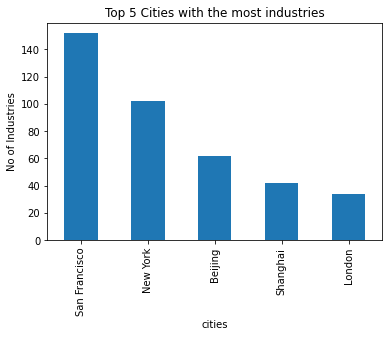

In [28]:
# count industries in each city, filter top 5 cities and plot a bar chart

industry_per_city = unicorn.groupby('city')['industry'].count()
sort_city = industry_per_city.sort_values(ascending=False)
top_5_cities = sort_city[0:5]

top_5_cities.plot(kind='bar')
plt.xlabel('cities')
plt.ylabel('No of Industries')
plt.title('Top 5 Cities with the most industries')
plt.show()

We see that the United states is the country with the most Unicorn companies and San Francisco is the city that appears to be industry hub.

### Question 4: Which investors have funded the most unicorns?

In [29]:
# Split the Investors column and create a new DataFrame with each investor in a separate row
investor_df = unicorn["select investors"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).rename("select investor")

# Count the occurrences of each investor
investor_counts = investor_df.value_counts()

# Filter first 10 rows
top10_investor = investor_counts[0:10]

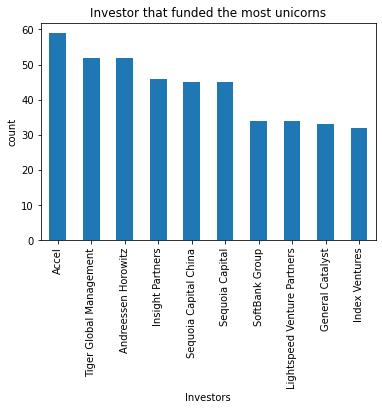

In [30]:
top10_investor.plot(kind='bar')
plt.xlabel('Investors')
plt.ylabel('count')
plt.title('Investor that funded the most unicorns')
plt.show()

It is seen that 'Accel' are the investors that funded the most Unicorn companies.

## Conclusion

In conclusion, we seen that many Unicorn companies were established in 2015 and many also became unicorn companies around 2021.
There exist little correlation between the different varibles.
In answering the questions asked, we found that 'Zapier' is the company with the highest ROI of 399,900B, it takes a company an average of '7 years' to become a Unicorn company and many companies took that long to become a unicorn company so we can infer that it has become a norm.
We see that the United states is the country with the most Unicorn companies and San Francisco is the city that appears to be industry hub. Finally, it is seen that 'Accel' are the investors that funded the most Unicorn companies.

## Recommendation

We recommend for investors to invest more in companies situated in the Industrial Hubs like San Francisco in the United states.
Also we recommend investors to invest in companies that have been establish on or before 2015 as they tend to do have high Rate of investment.